<a href="https://colab.research.google.com/github/mvincentbb/CEREBRO_AI_PROJECT/blob/main/Decision_tree_semi_supervid_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descision Tree Classifier With Semi Supervised Learning

### What is Semi-Supervised Learning:
Semi-supervised learning combines a small amount of labeled data with a larger amount of unlabeled data to train a machine learning model.

### What is Decision Tree Classifier:
A decision tree is a supervised machine learning algorithm that is a flowchart-like tree structure where it predicts the value of a target variable by learning simple decision rules inferred from the data features(or attributes). The internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.
Read more:

1.https://scikit-learn.org/stable/modules/tree.html

2.https://www.datacamp.com/tutorial/decision-tree-classification-python

### Importing Needed Libraries



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import PIL
import cv2
import os
import pathlib
import shutil
from sklearn import preprocessing
from sklearn.model_selection import KFold

# Remove folders if needed

In [ ]:
def delete_folder(folder_name):
  directory_to_delete="/content/data_256_" + folder_name
  try:
    shutil.rmtree(directory_to_delete)

  except Exception as e:
    print(e)

### Upload the dataset into the notebook
The following steps will be to upload the data here and then unzip the file that contains them.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_256.zip to data_256 (1).zip


In [ ]:
!unzip drive/MyDrive/CEREBRO/data_256.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data_256/library indoor/00000428.jpg  
  inflating: data_256/library indoor/00000400.jpg  
  inflating: data_256/library indoor/00000366.jpg  
  inflating: data_256/library indoor/00000372.jpg  
  inflating: data_256/library indoor/00000414.jpg  
  inflating: data_256/library indoor/00000399.jpg  
  inflating: data_256/library indoor/00000158.jpg  
  inflating: data_256/library indoor/00000164.jpg  
  inflating: data_256/library indoor/00000602.jpg  
  inflating: data_256/library indoor/00000616.jpg  
  inflating: data_256/library indoor/00000170.jpg  
  inflating: data_256/library indoor/00000825.jpg  
  inflating: data_256/library indoor/00000831.jpg  
  inflating: data_256/library indoor/00000819.jpg  
  inflating: data_256/library indoor/00000992.jpg  
  inflating: data_256/library indoor/00000986.jpg  
  inflating: data_256/library indoor/00000038.jpg  
  inflating: data_256/library indoor/0

### Check the count for the uploaded data

In [ ]:
data_dir = pathlib.Path('/content/data_256')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

5000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Display an image from the data

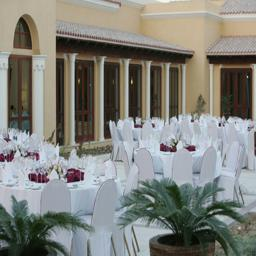

In [ ]:
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

## Preproccessing
Our first step is to reduce the dimensionality of our dataset images because of the limited resources we have.

### Resize

In [ ]:
# Base directory containing the folders of images
base_input_directory = '/content/data_256'
base_output_directory = '/content/data_256_resize'

# Ensure the base output directory exists
if not os.path.exists(base_output_directory):
  os.makedirs(base_output_directory)

# Loop through each subfolder in the base input directory
for folder in os.listdir(base_input_directory):
  input_folder = os.path.join(base_input_directory, folder)
  output_folder = os.path.join(base_output_directory, folder)

  # Create an output subfolder if it doesn't exist
  if not os.path.exists(output_folder):
      os.makedirs(output_folder)

  # Process each image in the folder
  for filename in os.listdir(input_folder):
      if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
          # Read the image
          img = cv2.imread(os.path.join(input_folder, filename))

          # Resize the image
          resized = cv2.resize(img, (128, 128))

          # Save the resized image to the corresponding output subfolder
          cv2.imwrite(os.path.join(output_folder, filename), resized)

print('All image processing complete.')


All image processing complete.


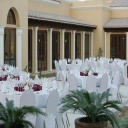

In [ ]:
data_dir = pathlib.Path('/content/data_256_resize')
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

### Grayscale

In [ ]:
# Base directory containing the folders of images
base_input_directory = '/content/data_256' # if you want to first resize the images, imput '/content/data_256_resize'
base_output_directory = '/content/data_256_grayscale'

# Ensure the base output directory exists
if not os.path.exists(base_output_directory):
  os.makedirs(base_output_directory)

# Loop through each subfolder in the base input directory
for folder in os.listdir(base_input_directory):
  input_folder = os.path.join(base_input_directory, folder)
  output_folder = os.path.join(base_output_directory, folder)

  # Create an output subfolder if it doesn't exist
  if not os.path.exists(output_folder):
      os.makedirs(output_folder)

  # Process each image in the folder
  for filename in os.listdir(input_folder):
      if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
          # Read the image
          img = cv2.imread(os.path.join(input_folder, filename))


          # Grayscale the image
          grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

          # Save the resized image to the corresponding output subfolder
          cv2.imwrite(os.path.join(output_folder, filename), grayscaled)

print('All image processing complete.')




All image processing complete.


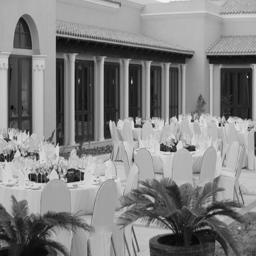

In [ ]:
data_dir = pathlib.Path('/content/data_256_grayscale')
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

### Flatten

In [ ]:
def load_images_and_labels(base_directory):
    images = []
    labels = []
    label_names = os.listdir(base_directory)

    # Loop over each label
    for label in label_names:
        folder_path = os.path.join(base_directory, label)
        if os.path.isdir(folder_path):
            # Loop over each image file
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                if filename.lower().endswith('.jpg'):
                    # Read the image
                    img = cv2.imread(file_path)

                    # Flatten the image and append to the list
                    images.append(img.flatten())
                    labels.append(label)

    return np.array(images), np.array(labels), label_names

# Path to the dataset
dataset_path = '/content/data_256_grayscale'
# images, labels, label_names = load_images_and_labels(dataset_path)
X_l, y_labeled, label_names = load_images_and_labels(dataset_path)


Normalisation

In [ ]:
X_labeled=preprocessing.normalize(X_l, axis=1)

### Split dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train_labeled, X_test, y_train_labeled, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=0)


labeled_percentage = 0.2  # You can adjust this as needed

# Split the labeled data into labeled and unlabeled subsets
X_labeled, X_unlabeled, y_labeled, _ = train_test_split(X_train_labeled, y_train_labeled, test_size=1 - labeled_percentage, random_state=0)

In [ ]:
print(len(X_test))
print(len(X_unlabeled))
print(len(y_labeled))

1000
3200
800


##Training

In [ ]:
# Train initial decision tree on labeled data

clf=DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=50) #we use the same hyperparameters as for the supervised model
clf = clf.fit(X_labeled, y_labeled)

y_pred_unlabeled = clf.predict(X_unlabeled)
Proba_unlabeled=clf.predict_proba(X_unlabeled)
Proba_labeled=clf.predict_proba(X_labeled)

y_pred_labeled=clf.predict(X_labeled)
print("Accuracy:", accuracy_score(y_labeled, y_pred_labeled))
print("Classification:\n", classification_report(y_labeled, y_pred_labeled))


In [ ]:
y_pred_labeled=clf.predict(X_labeled)
print("Accuracy:", accuracy_score(y_labeled, y_pred_labeled))
print("Classification:\n", classification_report(y_labeled, y_pred_labeled))

Accuracy: 0.4894966309948474
Classification:
                 precision    recall  f1-score   support

   art_gallery       0.51      0.44      0.47       500
  banquet_hall       0.61      0.39      0.48       502
    hotel_room       0.37      0.66      0.47       472
library indoor       0.52      0.58      0.55       534
   supermarket       0.60      0.37      0.46       515

      accuracy                           0.49      2523
     macro avg       0.52      0.49      0.49      2523
  weighted avg       0.52      0.49      0.49      2523



In [ ]:
threshold=0.95
len_labeled=len(X_labeled)

for i in range (0,7):
  delet=[]
  for j in range (0,len(X_unlabeled)):
    if max(Proba_unlabeled[j]) > threshold: #or Proba_unlabeled[j][label_names.index(y_pred_unlabeled[j])] > threshold
      X_labeled=np.append(X_labeled,[X_unlabeled[j]], axis=0)
      y_labeled=np.append(y_labeled,[y_pred_unlabeled[j]], axis=0)
      delet.append(j)
      # X_unlabeled=np.delete(X_unlabeled,j, axis=0)
  delet.reverse()
  for k in delet:
    X_unlabeled=np.delete(X_unlabeled,k, axis=0)
  # Proba_labeled=clf.predict_proba(X_labeled)
  # delet2=[]
  # for l in range (0,len(X_labeled)):
  #   if max(Proba_labeled[l]) < min(threshold,0.7):
  #     X_unlabeled=np.append(X_unlabeled,[X_labeled[l]], axis=0)
  #     delet2.append(l)
  # delet2.reverse()
  # for m in delet2:
  #   X_labeled=np.delete(X_labeled,m, axis=0)
  #   y_labeled=np.delete(y_labeled,m, axis=0)
  len_labeled_2=len(X_labeled)
  print(len_labeled_2-len_labeled)
  len_labeled=len_labeled_2
  clf = clf.fit(X_labeled, y_labeled)
  y_pred_unlabled = clf.predict(X_unlabeled)
  Proba_unlabeled=clf.predict_proba(X_unlabeled)
  Proba_labeled=clf.predict_proba(X_labeled)
  threshold-=0.05
  y_pred_labeled=clf.predict(X_labeled)
  print("Accuracy:", accuracy_score(y_labeled, y_pred_labeled))
  print("Classification:\n", classification_report(y_labeled, y_pred_labeled))
  y_pred_test=clf.predict(X_test)
  print("Accuracy:", accuracy_score(y_test, y_pred_test))
  print("Classification:\n", classification_report(y_test, y_pred_test))



0
Accuracy: 0.59125
Classification:
                 precision    recall  f1-score   support

   art_gallery       0.61      0.64      0.63       169
  banquet_hall       0.51      0.66      0.58       145
    hotel_room       0.60      0.46      0.52       160
library indoor       0.62      0.52      0.57       158
   supermarket       0.62      0.67      0.65       168

      accuracy                           0.59       800
     macro avg       0.59      0.59      0.59       800
  weighted avg       0.60      0.59      0.59       800

233
Accuracy: 0.6515004840271055
Classification:
                 precision    recall  f1-score   support

   art_gallery       0.75      0.53      0.62       169
  banquet_hall       0.54      0.39      0.45       145
    hotel_room       0.67      0.71      0.69       222
library indoor       0.71      0.81      0.75       329
   supermarket       0.52      0.63      0.57       168

      accuracy                           0.65      1033
     macro a

k_fold

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X_labeled, y_labeled, X_unlabeled are prepared

# Initialize the base classifier
# classifier = DecisionTreeClassifier()

# Initial training with the labeled data
# classifier.fit(X_labeled, y_labeled)

# Function to calculate prediction probabilities and filter based on a threshold
def augment_labeled_set(X_labeled, y_labeled, X_unlabeled, threshold):
    probs = clf.predict_proba(X_unlabeled)
    max_probs = np.max(probs, axis=1)
    confident_indices = np.where(max_probs >= threshold)[0]
    if len(confident_indices) == 0:
        return X_labeled, y_labeled, X_unlabeled, False  # No more confident predictions

    # Augment the labeled set with confidently predicted samples
    confident_samples = X_unlabeled[confident_indices]
    confident_labels = np.argmax(probs, axis=1)[confident_indices]

    X_labeled = np.vstack((X_labeled, confident_samples))
    y_labeled = np.concatenate((y_labeled, confident_labels))

    # Remove confident samples from unlabeled
    X_unlabeled = np.delete(X_unlabeled, confident_indices, axis=0)

    return X_labeled, y_labeled, X_unlabeled, True

# Starting threshold and decrement each loop
threshold = 0.95
decrement = 0.05  # Adjust this value based on how quickly you want to lower the threshold

# Loop exactly five times
for i in range(1):
    X_labeled, y_labeled, X_unlabeled, continue_loop = augment_labeled_set(
        X_labeled, y_labeled, X_unlabeled, threshold)
    if not continue_loop:
        break  # Exit early if no more confident predictions are found
    clf.fit(X_labeled, y_labeled)  # Retrain with augmented labeled set
    threshold -= decrement  # Lower the threshold for the next loop
    if threshold < 0:  # Ensure threshold doesn't go below 0
        threshold = 0

# Predictions for validation or test set can be done here
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Final model accuracy on test set:", accuracy)


Final model accuracy on test set: 0.226


In [ ]:
y_pred_labeled=clf.predict(X_labeled)
print("Accuracy:", accuracy_score(y_labeled, y_pred_labeled))
print("Classification:\n", classification_report(y_labeled, y_pred_labeled))

Accuracy: 0.5197651663405088
Classification:
                 precision    recall  f1-score   support

             0       0.00      0.00      0.00        12
             1       0.00      0.00      0.00        11
             2       0.00      0.00      0.00         2
             4       0.00      0.00      0.00         7
   art_gallery       0.46      0.54      0.50       500
  banquet_hall       0.43      0.64      0.51       502
    hotel_room       0.56      0.47      0.51       472
library indoor       0.62      0.54      0.58       534
   supermarket       0.61      0.44      0.51       515

      accuracy                           0.52      2555
     macro avg       0.30      0.29      0.29      2555
  weighted avg       0.53      0.52      0.52      2555



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Function to calculate prediction probabilities and filter based on a threshold
def augment_labeled_set(X_labeled, y_labeled, X_unlabeled, threshold):
    probs = clf.predict_proba(X_unlabeled)
    max_probs = np.max(probs, axis=1)
    confident_indices = np.where(max_probs >= threshold)[0]
    if len(confident_indices) == 0:
        return X_labeled, y_labeled, X_unlabeled, False  # No more confident predictions

    # Augment the labeled set with confidently predicted samples
    confident_samples = X_unlabeled[confident_indices]
    confident_labels = np.argmax(probs, axis=1)[confident_indices]

    X_labeled = np.vstack((X_labeled, confident_samples))
    y_labeled = np.concatenate((y_labeled, confident_labels))

    # Remove confident samples from unlabeled
    X_unlabeled = np.delete(X_unlabeled, confident_indices, axis=0)

    return X_labeled, y_labeled, X_unlabeled, True

# Starting threshold and decrement each loop
threshold = 0.95
decrement = 0.05  # Adjust this value based on how quickly you want to lower the threshold

# Loop exactly five times
for i in range(7):
    X_labeled, y_labeled, X_unlabeled, continue_loop = augment_labeled_set(
        X_labeled, y_labeled, X_unlabeled, threshold)
    if not continue_loop:
        break  # Exit early if no more confident predictions are found
    clf.fit(X_labeled, y_labeled)  # Retrain with augmented labeled set
    threshold -= decrement  # Lower the threshold for the next loop
    if threshold < 0:  # Ensure threshold doesn't go below 0
        threshold = 0

# Predictions for validation or test set can be done here
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Final model accuracy on test set:", accuracy)

Final model accuracy on test set: 0.225


In [ ]:
y_pred_labeled=clf.predict(X_labeled)
print("Accuracy:", accuracy_score(y_labeled, y_pred_labeled))
print("Classification:\n", classification_report(y_labeled, y_pred_labeled))

Accuracy: 0.4514680483592401
Classification:
                 precision    recall  f1-score   support

             0       0.00      0.00      0.00        12
             1       0.00      0.00      0.00        11
            10       0.00      0.00      0.00         7
            11       0.44      0.22      0.29        69
            12       0.00      0.00      0.00        16
            13       0.00      0.00      0.00        22
            14       0.00      0.00      0.00         3
            15       0.00      0.00      0.00        30
            16       0.44      0.68      0.53        25
            17       0.00      0.00      0.00        19
            18       0.30      0.30      0.30        44
            19       0.00      0.00      0.00        13
             2       0.00      0.00      0.00         2
            21       0.00      0.00      0.00        62
             3       0.00      0.00      0.00         1
             4       0.00      0.00      0.00         7
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
